ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

In [1]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# StatsModels
!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Download the file
!pip install wget
!python -m wget -o Auto.csv http://www.donlapark.cmustat.com/229351/data/Auto.csv

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c763ac53c8603967a2a6868d42208bdfd3d6cc4084e0176e4ff06e8af1b0a202
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/wget.py", line 568, in <module>
    filename = download(args[0], out=options.output)
  File "/usr/local/lib/python3.10/dist-packages/wget.py", line 526, in download
    (tmpfile, headers) = ulib.urlretrieve(binurl, tmpfile, callback)
  File "/usr/lib/python3.10/urllib/request.py", line 241, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "/usr/lib/python3.10/urll

In [3]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
auto = pd.read_csv('Auto.csv',na_values=["?"])

# ลบแถวที่มี missing values
auto = auto.dropna()

auto = auto.drop(['name', 'origin'],axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


#Linear model diagnosis

In [4]:
# simple linear regression on Auto dataset
auto_lr = smf.ols('mpg ~ horsepower ', data=auto).fit()
print(auto_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           7.03e-81
Time:                        04:15:06   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

###คำนวณ Residuals $y_i-\hat{y}_i$
ค่า y ของจริงลบด้วยค่า y ที่ทำนายมา

In [5]:
#Fitted values
auto_fitted = auto_lr.predict(auto)

#Residuals
auto_res = auto['mpg']-auto_fitted

print(auto_res)

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64


### หรือสามารถดึง predictions และ residuals จากโมเดลได้โดยตรง

In [6]:
#Fitted values
auto_fitted_ = auto_lr.fittedvalues

#Residuals
auto_res_ = auto_lr.resid

print(auto_fitted_ == auto_fitted)
print(auto_res_ == auto_res)

0      True
1      True
2      True
3      True
4      True
       ... 
392    True
393    True
394    True
395    True
396    True
Length: 392, dtype: bool
0      True
1      True
2      True
3      True
4      True
       ... 
392    True
393    True
394    True
395    True
396    True
Length: 392, dtype: bool


###1. ทดสอบ non-linearity

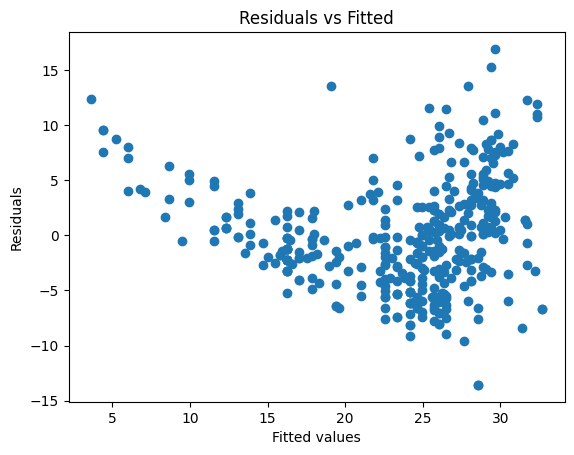

In [7]:
plt.scatter(auto_fitted, auto_res)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

In [ ]:
plt.scatter(auto_lr.fittedvalues, auto_lr.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

print(auto_lr.fittedvalues)

In [8]:
# +I() เป็นการบอกว่าจะใส่ฟังก์ชันอะไร
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           5.40e-99
Time:                        04:19:32   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

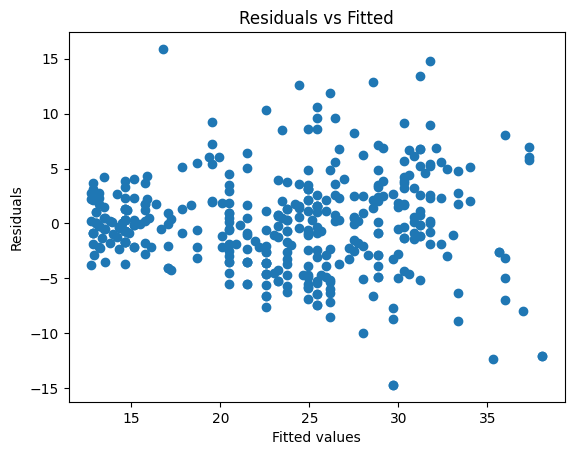

In [9]:
plt.scatter(auto_lr2.fittedvalues, auto_lr2.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

###2. ทดสอบ independence of errors
2.1 ตรวจสอบโดยการ plot time vs residuals (ถ้าสามารถทำได้)

2.2 ตรวจสอบด้วย Durbin-Wutson test  

H0: There is no correlation among the residuals.  
H1: The residuals are correlated.

The Durbin-Watson statistic ranges in value from 0
to 4. A value near 2 indicates non-correlation; a value toward 0 indicates positive
correlation; a value toward 4 indicates negative correlation.

Reject H0 if d < dL  
Accept H0 if d > dU

Durbin-Watson table: https://www.real-statistics.com/statistics-tables/durbin-watson-table/

In [10]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           5.40e-99
Time:                        04:21:40   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

### ดูตาราง Durbin-Watson Alpha = .05 n = 350 และ k = 2

ได้ค่า dL = 1.813 dU = 1.836

ดังนั้น Reject H0 -- มี correlation ระหว่าง residuals

###3. ทดสอบ constant variance

In [11]:
auto_lr3 = smf.ols('I(np.log(mpg)) ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr3.summary())

                            OLS Regression Results                            
Dep. Variable:         I(np.log(mpg))   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          4.54e-112
Time:                        04:21:50   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4022      0

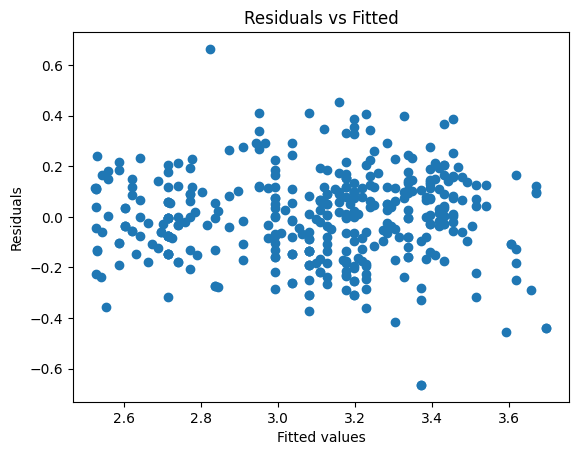

In [12]:
plt.scatter(auto_lr3.fittedvalues, auto_lr3.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

### ใช้ Breush-Pagan test


H0: The residuals are distributed with equal variance  
H1: The residuals are not distributed with equal variance


In [13]:
import statsmodels.stats.api as sms

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(auto_lr2.resid, auto_lr2.model.exog)
pd.DataFrame({'Name':name, 'value':test})

,Name,value
0,Lagrange multiplier statistic,3.452843e+01
1,p-value,3.178682e-08
2,f-value,1.878689e+01
3,f p-value,1.626798e-08


### p-value < 0.05 ดังนั้น accept H1

### 4., 5. หา outliers และ leverage points

In [ ]:
import statsmodels.graphics.api as smg

smg.influence_plot(auto_lr2, size=10)

#Cook's distance line ที่ระดับ 0.5
p = 1 # จำนวนตัวแปรต้น
x = np.linspace(0.01, 0.1, 50)
plt.plot(x, np.sqrt(0.5*p*(1 - x)/x), color='red', linestyle='dashed')

plt.xlim(0,0.1)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage');

###6. ทดสอบ multicollinearity

ลบตัวแปรที่มีค่า VIF > 10

In [ ]:
print(auto_lr4.model.exog) #matrix of exogenous variables
print(auto_lr4.model.exog_names) #names of exogenous variables

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

auto_lr4 = smf.ols('mpg ~ cylinders \
                          +displacement \
                          +horsepower \
                          +weight \
                          +acceleration', data=auto).fit()

exog = auto_lr4.model.exog
exog_names = auto_lr4.model.exog_names

for i in range(1,len(exog_names)):
  print(exog_names[i],vif(exog,i))



###Exercise 2

ดาวน์โหลดข้อมูลการขายเบาะรถยนต์ใน link โดยรันโค้ดข้างล่างนี้


In [ ]:
# Download the file
!wget -o Carseats.csv http://www.donlapark.cmustat.com/229351/data/Carseats.csv


Sales

    Unit sales (in thousands) at each location
CompPrice

    Price charged by competitor at each location
Income

    Community income level (in thousands of dollars)
Advertising

    Local advertising budget for company at each location (in thousands of dollars)
Population

    Population size in region (in thousands)
Price

    Price company charges for car seats at each site
ShelveLoc

    A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age

    Average age of the local population
Education

    Education level at each location
Urban

    A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US

    A factor with levels No and Yes to indicate whether the store is in the US or not

In [ ]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
carseats = pd.read_csv('Carseats.csv')

carseats.head()

In [ ]:
all_predictors = '+'.join(carseats.columns.drop('Sales')) #ใช้สูตร 'Sales ~' + all_predictors ในการสร้างโมเดล

'Sales ~ ' + all_predictors

### Bad = Intercept + other values
### Medium = Intercept + other values + ShelveLoc(Med)*1
### Good = Intercept + other values + ShelveLoc(Good)*1

###จงสร้าง residual plot และ influence plot แล้วตอบคำถามต่อไปนี้

1. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) กับชั้นที่มีคุณภาพต่ำ (ShelveLoc (Bad)) ต่างกันอย่างไร ต่างกันเท่าไหร่
2. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพดี (ShelveLoc (Good)) กับชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) ต่างกันอย่างไร ต่างกันเท่าไหร่
3. จงตรวจสอบว่าข้อมูลที่ใช้มีความเหมาะสมกับการสร้าง linear regression หรือไม่ โดยพิจารณาสิ่งต่างๆเหล่านี้พร้อมกับให้เหตุผล  
  3.1 Non-linearity  
  3.2 Independence of errors  
  3.3 Constant variance  
  3.4 Outliers  
  3.5 Leverage points  
  3.6 Multicollinearity
